In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# ==========================================
# 0. ปรับตั้งค่า Parameter ตรงนี้ได้เลย
# ==========================================
LEARNING_RATE = 0.001       # Learning Rate (η)
EPOCHS = 50                # Epochs
BATCH_SIZE = 32            # Batch Size
ACTIVATION = 'relu'        # Activation Function (เช่น 'relu', 'tanh', 'sigmoid')
DROPOUT_RATE = 0.2         # Dropout Rate
# เราสามารถกำหนดจำนวน Node ในแต่ละชั้นได้ที่นี่
HIDDEN_UNITS_L1 = 32       
HIDDEN_UNITS_L2 = 16       
# เลือก Optimizer: tf.keras.optimizers.Adam, SGD, RMSprop
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# = :=========================================

# 1. โหลดข้อมูล
df = pd.read_csv('updated_cleaned_patient_data.csv')
df = df.fillna(df.mean())

# 2. แยก Features (X) และ Target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# 3. แบ่งข้อมูล
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. สร้างโครงสร้าง Neural Network
model = models.Sequential([
    # Input Layer และ Hidden Layer ที่ 1 (Hidden Units/Activation)
    layers.Dense(HIDDEN_UNITS_L1, activation=ACTIVATION, input_shape=(X_train.shape[1],)),
    layers.Dropout(DROPOUT_RATE), # Dropout Rate
    
    # Hidden Layer ที่ 2 (Number of Hidden Layers สามารถเพิ่ม/ลด layers.Dense ได้ตรงนี้)
    layers.Dense(HIDDEN_UNITS_L2, activation=ACTIVATION),
    
    # Output Layer
    layers.Dense(1, activation='sigmoid')
])

# 6. Compile โมเดล (Optimizer)
model.compile(optimizer=OPTIMIZER,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 7. เทรนโมเดล (Epochs / Batch Size)
history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=0.2,
                    verbose=1)

# 8. วัดผลโมเดล
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nAccuracy on Test Set: {accuracy*100:.2f}%")

Epoch 1/50


C:\Users\PP\miniconda3\envs\Ai_lab\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6422 - loss: 0.6621 - val_accuracy: 0.7250 - val_loss: 0.6287
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7516 - loss: 0.5974 - val_accuracy: 0.7437 - val_loss: 0.5754
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7656 - loss: 0.5534 - val_accuracy: 0.7250 - val_loss: 0.5271
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7531 - loss: 0.5226 - val_accuracy: 0.7312 - val_loss: 0.4934
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7625 - loss: 0.4924 - val_accuracy: 0.7500 - val_loss: 0.4637
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7734 - loss: 0.4659 - val_accuracy: 0.7437 - val_loss: 0.4415
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7688 - loss: 0.4538 - val_accuracy: 0.7500 - val_loss: 0.4253
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7766 - loss: 0.4392 - val_accuracy: 0.7625 - val_loss: 0.4123
Ep

Epoch 1/200


C:\Users\PP\miniconda3\envs\Ai_lab\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7047 - loss: 0.6300 - val_accuracy: 0.7437 - val_loss: 0.5911
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7437 - loss: 0.5836 - val_accuracy: 0.7437 - val_loss: 0.5415
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7516 - loss: 0.5345 - val_accuracy: 0.7500 - val_loss: 0.5011
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7516 - loss: 0.5145 - val_accuracy: 0.7500 - val_loss: 0.4718
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7547 - loss: 0.4904 - val_accuracy: 0.7688 - val_loss: 0.4508
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7625 - loss: 0.4823 - val_accuracy: 0.7750 - val_loss: 0.4339
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7750 - loss: 0.4543 - val_accuracy: 0.7937 - val_loss: 0.4181
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7797 - loss: 0.4617 - val_accuracy: 0.7875 - val_loss: 0.

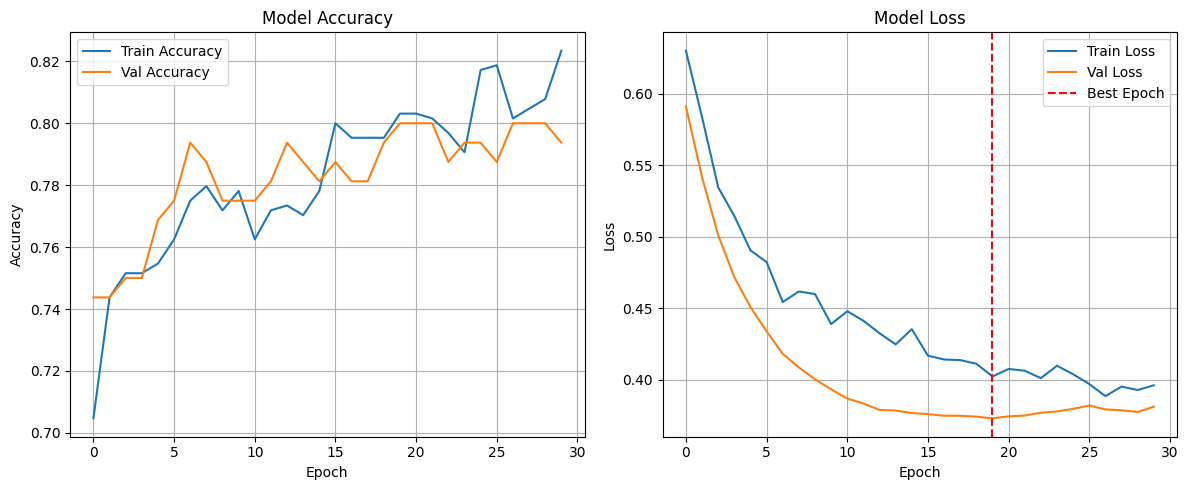

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # เพิ่มเพื่อวาดกราฟ
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks # เพิ่ม callbacks

# ==========================================
# 0. ปรับตั้งค่า Parameter
# ==========================================
LEARNING_RATE = 0.001
MAX_EPOCHS = 200        # ตั้งเผื่อไว้เยอะๆ เพราะเราจะใช้ Early Stopping หยุดเอง
BATCH_SIZE = 32
ACTIVATION = 'relu'
DROPOUT_RATE = 0.2
HIDDEN_UNITS_L1 = 32
HIDDEN_UNITS_L2 = 16
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# 1. โหลดข้อมูล
df = pd.read_csv('updated_cleaned_patient_data.csv')
df = df.fillna(df.mean())

# 2. แยก Features และ Target
X = df.drop('stroke', axis=1)
y = df['stroke']

# 3. แบ่งข้อมูล
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. สร้างโครงสร้าง Neural Network
model = models.Sequential([
    layers.Dense(HIDDEN_UNITS_L1, activation=ACTIVATION, input_shape=(X_train.shape[1],)),
    layers.Dropout(DROPOUT_RATE),
    layers.Dense(HIDDEN_UNITS_L2, activation=ACTIVATION),
    layers.Dense(1, activation='sigmoid')
])

# 6. Compile โมเดล
model.compile(optimizer=OPTIMIZER, loss='binary_crossentropy', metrics=['accuracy'])

# ==========================================
# 7. เพิ่มระบบหา Epoch ที่ดีที่สุด (Early Stopping)
# ==========================================
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',      # ดูจากค่า Loss ของข้อมูล Validation
    patience=10,             # ถ้า Loss ไม่ลดลงติดต่อกัน 10 รอบ จะหยุดเทรนทันที
    restore_best_weights=True # เมื่อหยุดแล้ว ให้ย้อนกลับไปใช้ค่า Weight ของรอบที่ดีที่สุด
)

# 8. เทรนโมเดล
history = model.fit(
    X_train, y_train,
    epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    callbacks=[early_stop], # ใส่ callback เข้าไปที่นี่
    verbose=1
)

# 9. วัดผลโมเดล
loss, accuracy = model.evaluate(X_test, y_test)
best_epoch = np.argmin(history.history['val_loss']) + 1 # หาจุดที่ Val Loss ต่ำสุด
print(f"\n--- Result ---")
print(f"Best Epoch: {best_epoch}")
print(f"Accuracy on Test Set: {accuracy*100:.2f}%")

# ==========================================
# 10. วาดกราฟแสดงผล (Visualization)
# ==========================================
plt.figure(figsize=(12, 5))

# กราฟ Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# กราฟ Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.axvline(best_epoch-1, color='red', linestyle='--', label='Best Epoch') # ขีดเส้นจุดที่ดีที่สุด
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

กำลังเริ่มเทรนโมเดล (Max 150 Epochs)...
Epoch 1/150


C:\Users\PP\miniconda3\envs\Ai_lab\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4719 - loss: 0.7334 - val_accuracy: 0.7250 - val_loss: 0.5836
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7391 - loss: 0.5599 - val_accuracy: 0.7312 - val_loss: 0.5098
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7500 - loss: 0.5173 - val_accuracy: 0.7250 - val_loss: 0.4585
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7547 - loss: 0.4760 - val_accuracy: 0.7750 - val_loss: 0.4244
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7859 - loss: 0.4513 - val_accuracy: 0.8062 - val_loss: 0.4020
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7812 - loss: 0.4349 - val_accuracy: 0.8062 - val_loss: 0.3889
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8000 - loss: 0.4257 - val_accuracy: 0.8062 - val_loss: 0.3844
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7953 - loss: 0.4203 - val_accuracy: 0.8000 - val_loss: 0.

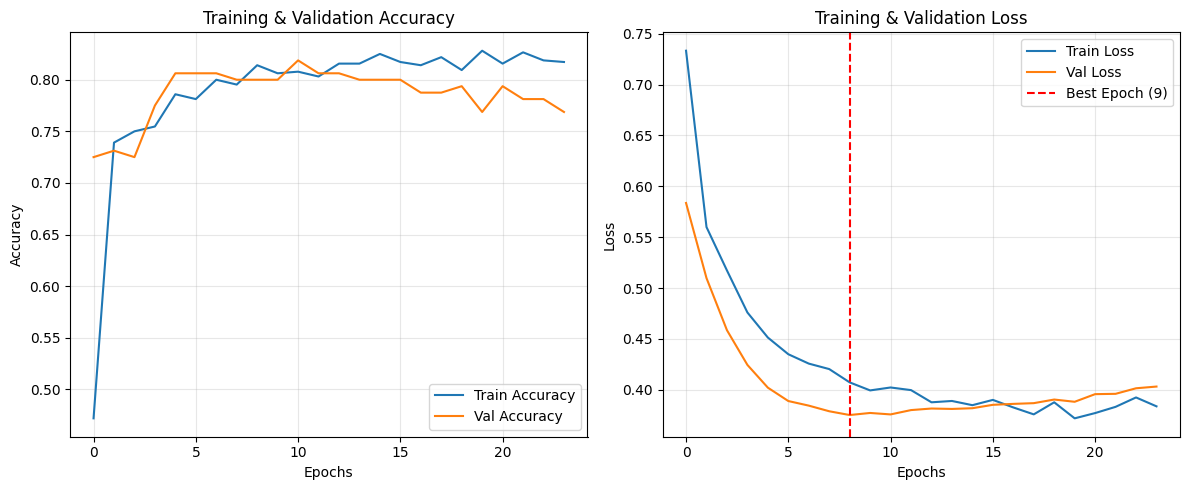

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# ==========================================
# 0. ส่วนการปรับ Parameter (แก้ตรงนี้ได้เลย)
# ==========================================
# --- การเทรน (Training Control) ---
LEARNING_RATE = 0.001     # ความเร็วในการเรียนรู้
MAX_EPOCHS = 150          # จำนวนรอบสูงสุด (ถ้า Early Stopping ไม่สั่งหยุดก่อน)
BATCH_SIZE = 32           # จำนวนข้อมูลที่ให้โมเดลดูต่อการปรับน้ำหนัก 1 ครั้ง
PATIENCE = 15             # ถ้า Loss ไม่ลดลงเกิน 15 รอบ จะหยุดเทรนทันที

# --- โครงสร้าง Model (Architecture) ---
HIDDEN_UNITS_L1 = 64      # จำนวน Node ในชั้นที่ 1
HIDDEN_UNITS_L2 = 32      # จำนวน Node ในชั้นที่ 2
ACTIVATION = 'relu'       # ฟังก์ชันกระตุ้น (เช่น 'relu', 'tanh', 'sigmoid')
DROPOUT_RATE = 0.3        # อัตราการสุ่มตัด Node (ป้องกัน Overfitting)

# --- ข้อมูล (Data) ---
FILE_NAME = 'updated_cleaned_patient_data.csv'
# ==========================================

# 1. โหลดข้อมูล
df = pd.read_csv(FILE_NAME)
df = df.fillna(df.mean())

# 2. เตรียม Features และ Target
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. สร้างโมเดล (ใช้ตัวแปรจากส่วนที่ 0)
model = models.Sequential([
    layers.Dense(HIDDEN_UNITS_L1, activation=ACTIVATION, input_shape=(X_train.shape[1],)),
    layers.Dropout(DROPOUT_RATE),
    layers.Dense(HIDDEN_UNITS_L2, activation=ACTIVATION),
    layers.Dense(1, activation='sigmoid')
])

# 5. Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 6. ตั้งค่าการหยุดอัตโนมัติ (Early Stopping)
early_stop = callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=PATIENCE, 
    restore_best_weights=True
)

# 7. เทรนโมเดล
print(f"กำลังเริ่มเทรนโมเดล (Max {MAX_EPOCHS} Epochs)...")
history = model.fit(
    X_train, y_train,
    epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# 8. สรุปผล
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
best_epoch = np.argmin(history.history['val_loss']) + 1

print("\n" + "="*30)
print(f"สรุปผลลัพธ์:")
print(f"- จำนวนรอบที่เทรนจริง: {len(history.history['loss'])} รอบ")
print(f"- Epoch ที่ดีที่สุด (Best Epoch): {best_epoch}")
print(f"- ความแม่นยำ (Test Accuracy): {accuracy*100:.2f}%")
print("="*30)

# 9. วาดกราฟแสดงแนวโน้ม
plt.figure(figsize=(12, 5))

# กราฟ Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='#1f77b4')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='#ff7f0e')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# กราฟ Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='#1f77b4')
plt.plot(history.history['val_loss'], label='Val Loss', color='#ff7f0e')
plt.axvline(best_epoch-1, color='red', linestyle='--', label=f'Best Epoch ({best_epoch})')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()